<a href="https://colab.research.google.com/github/RajK853/tum-adlr-ss21-11/blob/main/notebook/Load_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
To execute this notebook in the Google colab, follow these steps:  

1. Save [this data](https://drive.google.com/file/d/11CskuM-dcD-aAyjb_Fs_RW6F7VVblKCW/view?usp=sharing) in your Google drive.
2. Mount your Google drive by executing the bottom cell.
3. Set `db_path` to the location where the above data is stored in your Google drive.

> If you are not executing this notebook in the Google colab, just ignore the bottom cell and set `db_path` to the location where the above data is stored in your local machine.

In [21]:
from google.colab import drive
drive.mount("/content/drive")
# Download the load.py file from our private github to use it in the Google colab.
import requests
%mkdir -p /adlr/src
%cd /adlr/src
url = r"https://raw.githubusercontent.com/RajK853/tum-adlr-ss21-11/main/src/load.py?token=ACE47QQZQ2MWHYIHLAI2YQLARSDFK"
with open("load.py", "w") as fp:
    req = requests.get(url)
    fp.write(req.text)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/adlr/src


In [2]:
# Change directory to src to import functions from load.py
%cd "../src"
from load import get_values_sql, compressed2img, object2numeric_array

/home/rajk/DIT/Advance DL for Robotics/tum-adlr-ss21-11/src


## Initialize global variables

In [4]:
db_path = r"/content/drive/MyDrive/ADLR Data Set/SingleSphere02.db"   # Path of the data in your Google drive / local machine

n_voxels = 64
voxel_size = 10 / 64     # in m
extent = [0, 10, 0, 10]  # in m
n_waypoints = 22         # start + 20 inner points + end
n_dim = 2
n_paths_per_world = 1000
n_worlds = 5000
path_rows = [0, 1, 2, 1000, 2000]

## Loading data

In [5]:
worlds = get_values_sql(file=db_path, table='worlds')
obstacle_images = compressed2img(img_cmp=worlds.obst_img_cmp.values, n_voxels=n_voxels, n_dim=n_dim)
print(f"Obstacle images dimension: {obstacle_images.shape}")

Obstacle images dimension: (5000, 64, 64)


Each world consists of **1000 paths** i.e. world 0 = 0 - 999, world 1 = 1000 - 1999, etc.

In [6]:
# always 1000 paths belong to one world
# 0...999     -> world 0
# 1000...1999 -> world 1
# 2000...2999 -> world 2
paths = get_values_sql(file=db_path, table='paths', rows=path_rows)
path_images = compressed2img(img_cmp=paths.path_img_cmp.values, n_voxels=n_voxels, n_dim=n_dim)
start_images = compressed2img(img_cmp=paths.start_img_cmp.values, n_voxels=n_voxels, n_dim=n_dim)
end_images = compressed2img(img_cmp=paths.end_img_cmp.values, n_voxels=n_voxels, n_dim=n_dim)

q_paths = object2numeric_array(paths.q_path.values)
q_paths = q_paths.reshape(-1, n_waypoints, n_dim)

## Plot an example

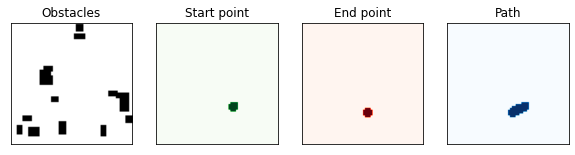

In [9]:
i = 4
row_world = path_rows[i]
i_world = paths.i_world[row_world].item()

_, axs = plt.subplots(nrows=1, ncols=4, figsize=(10, 10))
axs[0].imshow(obstacle_images[i_world].T, origin='lower', extent=extent, cmap='binary')
axs[1].imshow(start_images[i].T, origin='lower', extent=extent, cmap='Greens')
axs[2].imshow(end_images[i].T, origin='lower', extent=extent, cmap='Reds')
axs[3].imshow(path_images[i].T, origin='lower', extent=extent, cmap='Blues')
# Set titles and remove x/y ticks
for (ax, title) in zip(axs, ("Obstacles", "Start point", "End point", "Path")) :
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

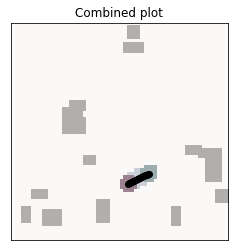

In [11]:
i = 4
row_world = path_rows[i]
i_world = paths.i_world[row_world].item()

fig, ax = plt.subplots()
ax.imshow(obstacle_images[i_world].T, origin='lower', extent=extent, cmap='binary')
ax.imshow(start_images[i].T, origin='lower', extent=extent, cmap='Greens', alpha=0.4)
ax.imshow(end_images[i].T, origin='lower', extent=extent, cmap='Reds', alpha=0.4)
ax.imshow(path_images[i].T, origin='lower', extent=extent, cmap='Blues', alpha=0.2)
ax.plot(*q_paths[i].T, color='k', marker='o')
plt.title("Combined plot")
plt.xticks([])
plt.yticks([])
plt.show()